# Eye-tracker pupil detection model   
<hr></hr>
<div ><b>Author:</b> Owen Burt <div style = "--display: inline; --text-align: right;" ><b>Date created:</b> 2/21/2025 </div>

<b>Description:</b>  

In this notebook I prepare data for a CNN that will predict the location of a pupil. 

<b>References:</b>  

<b>Sources:</b>  
  


In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import os as os

# Data preprocessing

I am starting with a folder containing all the images and their corresponding annotations as well as a csv that contains the file name of the image and the boundries of the pupil. In order to train a model on this data I will need images to be a 3D array and the boundries to be in an array that corresponds to the correct image in the image array.

In [2]:
cwd = os.getcwd()
df = pd.read_csv(cwd + "/eye_data.csv")

In [3]:
df.head()

,file_name,obj_class,x1,y1,x2,y2
0,WIN_20250205_16_00_55_Pro.jpg,pupil,257,163,276,195
1,WIN_20250205_16_00_56_Pro.jpg,pupil,279,128,308,156
2,WIN_20250205_16_00_57_Pro.jpg,pupil,313,138,346,170
3,WIN_20250205_16_00_58_Pro.jpg,pupil,278,141,305,172
4,WIN_20250205_16_00_59_Pro.jpg,pupil,263,150,286,181


## Splitting data into training, testing, and validation groups.

In [4]:

from sklearn.model_selection import train_test_split

X = df['file_name']
y = df[['x1', 'y1', 'x2', 'y2']]

train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 


## Converting images and boundy data to arrays  
Currently X_data is a series of file names and y_data is in data-frame format. We want the training data (X) to be a 3D array of pixel data and the target data (y) to be an array containing just the boundries with no label. I will creat two functions that handle this seperately.

#### Creating functions

In [ ]:
# may not need to resize the image if I use the fast r-cnn with tensorflow
def resize_image(image):
    image = tf.image.resize(image, [256, 256])
    return image

def images_to_arr(X):
    '''
    images_to_arr gets image path, loads the image, then converts it to a 3D array. 
        It also normalizes the pixel values to be between 0 and 1.
    
    :param X: the series of image file names to be converted.
    '''
    X_data = []
    for i in range(len(X)):
        img_path = cwd + '\\image_data\\' + df['file_name'][i]
        image = tf.keras.utils.load_img(img_path)
        image = resize_image(image) # resizing
        image_as_arr = tf.keras.utils.img_to_array(image)/255.0
        X_data.append(image_as_arr)
    return np.array(X_data)


In [6]:
def bounds_to_arr(y):
    '''
    bounds_to_arr converts boundry data from a dataframe to a np array containing just the coordinates. 
        It also normalizes the boundry values to be between 0 and 1

    :param y: the dataframe of boundry data to be converted.
    '''
    img_width = 640.0
    img_hight = 360.0
    y_data = []
    for i in range(len(y)):
        y_data.append((y.iloc[i].iloc[0]/img_width, y.iloc[i].iloc[1]/img_hight, y.iloc[i].iloc[2]/img_width, y.iloc[i].iloc[3]/img_hight))
    return np.array(y_data)

#### Calling functions

In [9]:
X_train = images_to_arr(X_train)
y_train = bounds_to_arr(y_train)
X_test = images_to_arr(X_test)
y_test = bounds_to_arr(y_test)
X_val = images_to_arr(X_val)
y_val = bounds_to_arr(y_val)

## Building CNN

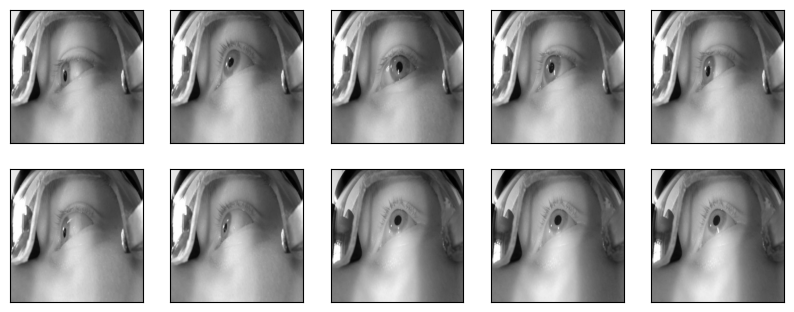

In [10]:
#code is from tensorflow website
#https://www.tensorflow.org/tutorials/images/cnn

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
plt.show()